In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
1)observe the saturation of layers for 10 epochs and 64 batch size:only conv layers and next dense layers as well
2)remove max pool and observe & chnage the max pool to avg pool
3)add early stop or drop out and observe
2)vary filters (increase and decrease and same) in single layer
3)vary filters in increasing and decreasing and same for sturatable layers
4)vary filter sizes
5)batch size for one layer
6)epochs for 1 layer
7)


In [ ]:
 %pip install idx2numpy  #To convert standard IDX format MNIST by "yan Lacun" into numpy array

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7920 sha256=6a7578049df05351998920ebe28f99012975bca89b72aa5e1db11dfca121ad08
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
 
import pandas
from keras.models import Sequential #swquential is for plain stack of layers with each having one i/p and one o/p
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
 import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
 
X_train = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-images-idx3-ubyte')### 60k training images each with 784 pixel elements 
Y_train = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-labels-idx1-ubyte')#### labels--digits for each training image among 60k
X_test=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-images-idx3-ubyte')
Y_test=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-labels-idx1-ubyte')
 
 
print('\ntrain images:',X_train.shape)
print('train labels:',Y_train.shape)
print('test images:',X_test.shape)
print('test labels:',Y_test.shape)


train images: (112800, 28, 28)
train labels: (112800,)
test images: (18800, 28, 28)
test labels: (18800,)


In [ ]:
X_train=X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test=X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')

In [ ]:
 y_1hot=np_utils.to_categorical(Y_train)
print(y_1hot)
y_1hotTest=np_utils.to_categorical(Y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
kernels=[1,2,3,4,5,6,7,8]
Tacrcy=[];
Vacrcy=[];
e=10
for l in kernels:
     model=Sequential()
     model.add(Conv2D(16,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'))
     model.add(MaxPooling2D(pool_size=(4,4),strides=(l,l),padding='valid'))
     #for i in range(1,int(l)):
      #    model.add(Conv2D(8,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
       #   model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    # model.add(Dropout(0.5))
     model.add(Flatten())
 
     model.add(Dense(100,activation='relu',name='i/p-layer'))
     model.add(Dense(47,activation='softmax',name='o/p-layer'))
 
     model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
     hit=model.fit(X_train,y_1hot,epochs=e,validation_split=0.33,batch_size=64,verbose=0)
     k=hit.history
     Tacrcy.append(k['accuracy'][e-1])
     Vacrcy.append(k['val_accuracy'][e-1])
     print(k['accuracy'][e-1])

0.021422427147626877
0.6353952884674072
0.021462123841047287
0.021051935851573944
0.7038835883140564
0.6879655718803406
0.2304995059967041
0.6383195519447327


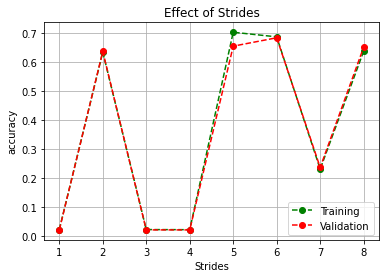

In [ ]:
k=[1,2,3,4,5,6,7,8]

plt.figure(1)
plt.plot(k,Tacrcy,color='g',marker='o',linestyle='dashed')
plt.plot(k,Vacrcy,color='r',marker='o',linestyle='dashed')
plt.xlabel('Strides')
plt.ylabel('accuracy')
plt.title('Effect of Strides')
plt.legend(['Training','Validation'])
plt.grid()

